In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


In [3]:
# Load the data from CSV (replace with your actual file path)
data = pd.read_csv('C:\Projects\EbixPro_AI_bot\Analysis\Best timing recomandation on social media platform\sample_purchase_data.csv')

# Display the first few rows to understand the structure of the data
print(data.head())


  order_id customer_id product_category  quantity   price  \
0     O001        C042        Furniture         1  194.33   
1     O002        C002             Toys         3  187.67   
2     O003        C031          Fashion         5  108.86   
3     O004        C026          Fashion         5  150.13   
4     O005        C045        Furniture         4  464.22   

    purchase_timestamp customer_age customer_gender       location  \
0  2021-02-06 18:00:00        25-34           Other  San Francisco   
1  2023-04-23 22:49:00        45-54            Male        Chicago   
2  2021-10-13 04:17:00          55+          Female        Houston   
3  2024-12-24 21:47:00          55+            Male  San Francisco   
4  2020-05-26 11:10:00        25-34          Female        Houston   

   marketing_channel engagement_time  
0                SMS        12:27 PM  
1                SMS        12:40 AM  
2  Push Notification        04:36 PM  
3  Push Notification        03:39 PM  
4       Social Me

In [4]:
data.head()

,order_id,customer_id,product_category,quantity,price,purchase_timestamp,customer_age,customer_gender,location,marketing_channel,engagement_time
0,O001,C042,Furniture,1,194.33,2021-02-06 18:00:00,25-34,Other,San Francisco,SMS,12:27 PM
1,O002,C002,Toys,3,187.67,2023-04-23 22:49:00,45-54,Male,Chicago,SMS,12:40 AM
2,O003,C031,Fashion,5,108.86,2021-10-13 04:17:00,55+,Female,Houston,Push Notification,04:36 PM
3,O004,C026,Fashion,5,150.13,2024-12-24 21:47:00,55+,Male,San Francisco,Push Notification,03:39 PM
4,O005,C045,Furniture,4,464.22,2020-05-26 11:10:00,25-34,Female,Houston,Social Media,06:22 PM


In [18]:
# Check for missing values
data.isnull().sum()


order_id                   0
customer_id                0
product_category           0
quantity                   0
price                      0
purchase_timestamp         0
customer_age               0
customer_gender            0
location                   0
marketing_channel          0
engagement_time            0
hour                       0
day_of_week                0
month                      0
engagement_time_minutes    0
dtype: int64

In [19]:
# Example: Fill missing values
data['customer_gender'].fillna(data['customer_gender'].mode()[0], inplace=True)
data['quantity'].fillna(data['quantity'].median(), inplace=True)


In [20]:
data['purchase_timestamp'] = pd.to_datetime(data['purchase_timestamp'])


In [21]:
data['year'] = data['purchase_timestamp'].dt.year
data['month'] = data['purchase_timestamp'].dt.month
data['day'] = data['purchase_timestamp'].dt.day
data['hour'] = data['purchase_timestamp'].dt.hour
data['minute'] = data['purchase_timestamp'].dt.minute
data['day_of_week'] = data['purchase_timestamp'].dt.weekday


In [22]:
age_mapping = {
    '18-24': 1, '25-34': 2, '35-44': 3, '45-54': 4, '55+': 5
}
data['customer_age'] = data['customer_age'].map(age_mapping)


In [23]:
data = pd.get_dummies(data, columns=['customer_age'], drop_first=True)


In [24]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
le_gender = LabelEncoder()
le_location = LabelEncoder()
le_channel = LabelEncoder()

data['customer_gender'] = le_gender.fit_transform(data['customer_gender'])
data['location'] = le_location.fit_transform(data['location'])
data['marketing_channel'] = le_channel.fit_transform(data['marketing_channel'])


In [25]:
data = pd.get_dummies(data, columns=['customer_gender', 'location', 'marketing_channel'], drop_first=True)


In [26]:
data['engagement_time'] = pd.to_datetime(data['engagement_time'], format='%I:%M %p')

data['engagement_hour'] = data['engagement_time'].dt.hour
data['engagement_minute'] = data['engagement_time'].dt.minute


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['price', 'quantity']] = scaler.fit_transform(data[['price', 'quantity']])


In [28]:
# Check the first few rows of the dataset
data.head()


,order_id,customer_id,product_category,quantity,price,purchase_timestamp,engagement_time,hour,day_of_week,month,...,customer_gender_2,location_1,location_2,location_3,location_4,marketing_channel_1,marketing_channel_2,marketing_channel_3,engagement_hour,engagement_minute
0,O001,C042,2,-1.469880,-0.489389,2021-02-06 18:00:00,1900-01-01 12:27:00,18,5,2,...,True,False,False,False,True,False,True,False,12,27
1,O002,C002,4,0.002946,-0.537954,2023-04-23 22:49:00,1900-01-01 00:40:00,22,6,4,...,False,False,False,False,False,False,True,False,0,40
2,O003,C031,1,1.475772,-1.112646,2021-10-13 04:17:00,1900-01-01 16:36:00,4,2,10,...,False,True,False,False,False,True,False,False,16,36
3,O004,C026,1,1.475772,-0.811700,2024-12-24 21:47:00,1900-01-01 15:39:00,21,1,12,...,False,False,False,False,True,True,False,False,15,39
4,O005,C045,2,0.739359,1.478682,2020-05-26 11:10:00,1900-01-01 18:22:00,11,1,5,...,False,True,False,False,False,False,False,True,18,22


In [30]:
# Check for missing values
print(data.isnull().sum())

# Summary statistics of numerical features
print(data.describe())

# Check data types and basic information
print(data.info())


order_id                   0
customer_id                0
product_category           0
quantity                   0
price                      0
purchase_timestamp         0
engagement_time            0
hour                       0
day_of_week                0
month                      0
engagement_time_minutes    0
year                       0
day                        0
minute                     0
customer_gender_1          0
customer_gender_2          0
location_1                 0
location_2                 0
location_3                 0
location_4                 0
marketing_channel_1        0
marketing_channel_2        0
marketing_channel_3        0
engagement_hour            0
engagement_minute          0
dtype: int64
       product_category      quantity         price  \
count         250.00000  2.500000e+02  2.500000e+02   
mean            1.96800  1.776357e-17  4.618528e-17   
min             0.00000 -1.469880e+00 -1.810867e+00   
25%             1.00000 -7.334673e-01 -7.6

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_id                 250 non-null    object        
 1   customer_id              250 non-null    object        
 2   product_category         250 non-null    int64         
 3   quantity                 250 non-null    float64       
 4   price                    250 non-null    float64       
 5   purchase_timestamp       250 non-null    datetime64[ns]
 6   engagement_time          250 non-null    datetime64[ns]
 7   hour                     250 non-null    int32         
 8   day_of_week              250 non-null    int32         
 9   month                    250 non-null    int32         
 10  engagement_time_minutes  250 non-null    int64         
 11  year                     250 non-null    int32         
 12  day                      250 non-nul

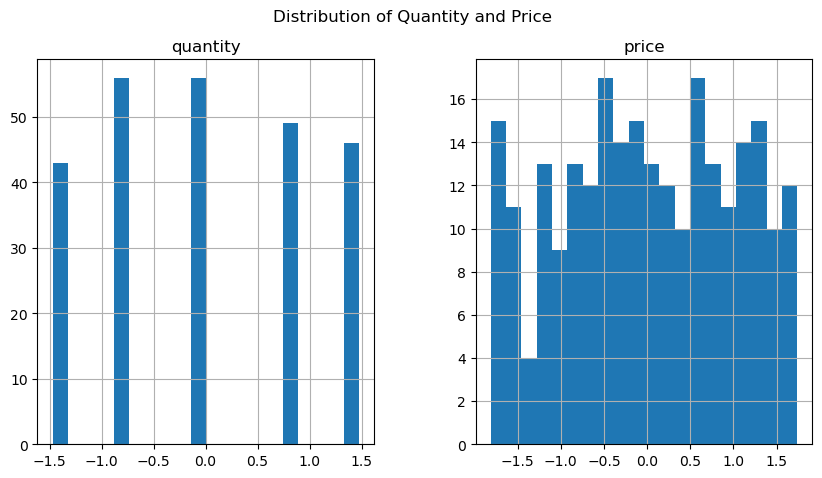

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for quantity and price
data[['quantity', 'price']].hist(figsize=(10, 5), bins=20)
plt.suptitle('Distribution of Quantity and Price')
plt.show()


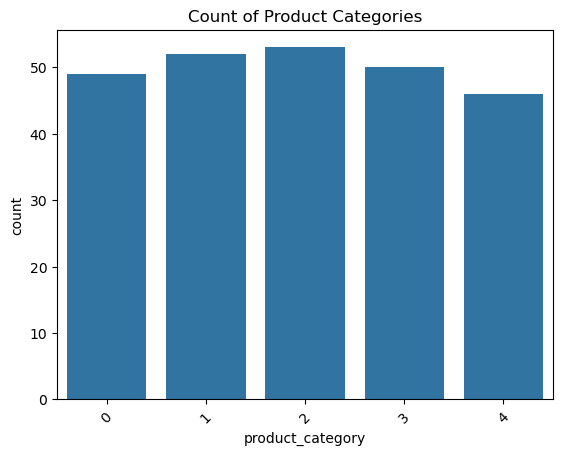

In [34]:
# Count plot of product categories
sns.countplot(x='product_category', data=data)
plt.title('Count of Product Categories')
plt.xticks(rotation=45)
plt.show()


In [38]:
# Check for duplicate entries
print("Duplicate rows:", data.duplicated().sum())

# Verify unique values in categorical fields
print(data[['product_category', 'day_of_week', 'month', 'year']].nunique())

# Check statistical summary
print(data.describe())


Duplicate rows: 0
product_category     5
day_of_week          7
month               12
year                 5
dtype: int64
       product_category      quantity         price  \
count         250.00000  2.500000e+02  2.500000e+02   
mean            1.96800  1.776357e-17  4.618528e-17   
min             0.00000 -1.469880e+00 -1.810867e+00   
25%             1.00000 -7.334673e-01 -7.680753e-01   
50%             2.00000  2.945652e-03 -1.343180e-02   
75%             3.00000  7.393586e-01  8.262014e-01   
max             4.00000  1.475772e+00  1.738646e+00   
std             1.39094  1.002006e+00  1.002006e+00   

               purchase_timestamp                engagement_time        hour  \
count                         250                            250  250.000000   
mean   2022-05-27 21:43:45.840000  1900-01-01 12:13:12.720000256   11.224000   
min           2020-01-04 19:52:00            1900-01-01 00:08:00    0.000000   
25%           2021-02-09 08:49:45            1900-01-01 06:00

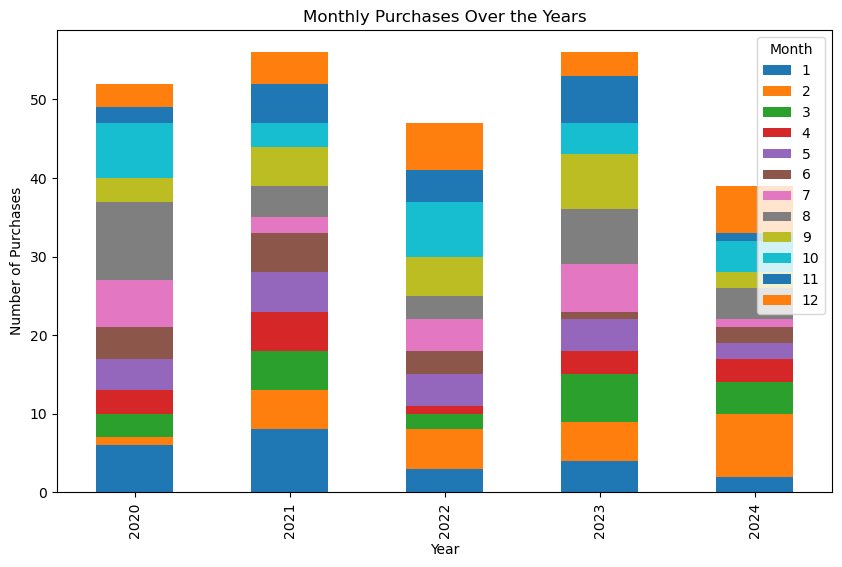

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Purchases by year and month
data.groupby(['year', 'month']).size().unstack().plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Monthly Purchases Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Purchases')
plt.legend(title='Month')
plt.show()


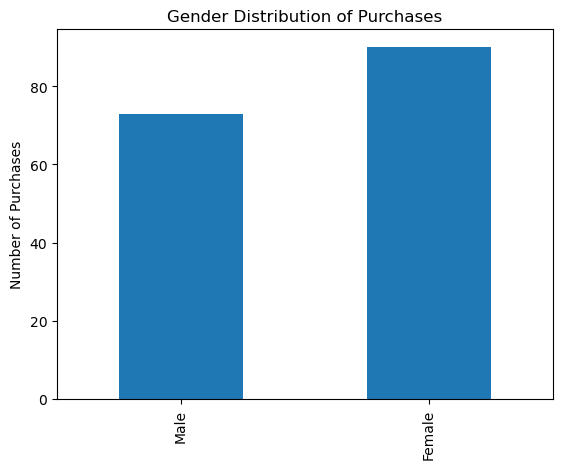

In [41]:
# Gender-based purchases
gender_counts = data[['customer_gender_1', 'customer_gender_2']].sum()
gender_counts.index = ['Male', 'Female']
gender_counts.plot(kind='bar', title='Gender Distribution of Purchases')
plt.ylabel('Number of Purchases')
plt.show()


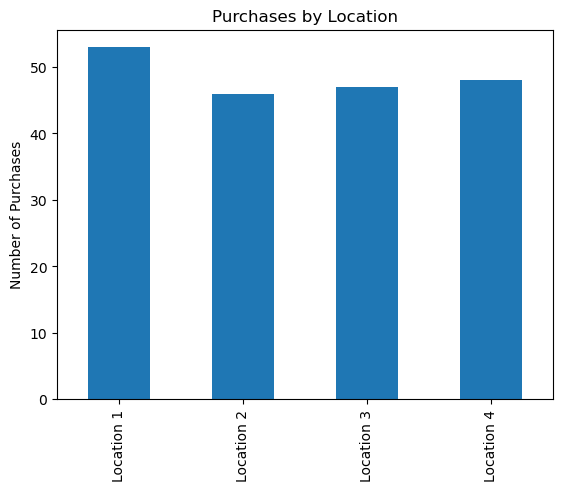

In [42]:
# Purchases by location
location_counts = data[['location_1', 'location_2', 'location_3', 'location_4']].sum()
location_counts.index = ['Location 1', 'Location 2', 'Location 3', 'Location 4']
location_counts.plot(kind='bar', title='Purchases by Location')
plt.ylabel('Number of Purchases')
plt.show()


In [43]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


ValueError: could not convert string to float: 'O001'

<Figure size 1200x800 with 0 Axes>